# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
twitter_archv_df = pd.read_csv('./data/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open('./data/image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_pred_df = pd.read_csv('./data/image-predictions.tsv', '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
import json

tweet_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        json_data = json.loads(line)
        tweet_list.append({'tweet_id': json_data['id'],
                          'favorites': json_data['favorite_count'],
                          'retweets': json_data['retweet_count']})
tweet_add_df = pd.DataFrame(tweet_list, columns=['tweet_id','favorites','retweets'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

### Twitter Archive Data

In [6]:
twitter_archv_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None
549,805207613751304193,NaN,NaN,2016-12-04 00:30:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,None,None,None,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None


In [7]:
print(twitter_archv_df.shape)
print(twitter_archv_df.dtypes)

(2356, 17)
tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


In [8]:
twitter_archv_df.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

#### Check names for uniqueness

In [9]:
twitter_archv_df.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

### Image Prediction Data

In [10]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,police_van,0.310143,False,minibus,0.068201,False
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False


In [11]:
print(image_pred_df.shape)
print(image_pred_df.dtypes)

(2075, 12)
tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [12]:
image_pred_df.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

### Additional Tweet Data

In [13]:
tweet_add_df.sample(5)

,tweet_id,favorites,retweets
1938,673716320723169284,3289,843
382,827199976799354881,11659,2579
265,841833993020538882,0,17504
1448,695816827381944320,3287,1320
1630,684460069371654144,2169,628


In [14]:
print(tweet_add_df.shape)
print(tweet_add_df.dtypes)

(2354, 3)
tweet_id     int64
favorites    int64
retweets     int64
dtype: object


In [15]:
tweet_add_df.isna().any()

tweet_id     False
favorites    False
retweets     False
dtype: bool

### Quality Issues
**Twitter Archive Data**

1. Rewtweets should be removed

2. Tweet_id is a Int datatype and should be converted to string

3. Timestamp is a object dataype and should be converted to datetime

4. Missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id, and in_reply_to_status_id

5. Unlikely names in names column

**Image Prediction Data**
6. p1, p2, p3 entries are not formatted consistently
7. p1, p2, p3 column names are not easily interpretable
8. p1, p2, p3 are of object datatype when category would be more appropriate

### Tidiness issues
1. Doggo, floofer, pupper and puppo represent dog "stage". New column of category dataypte should be generated.
2. Additional data should be merged with twitter archive data via tweet_id.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [16]:
# Make copies of original pieces of data
twitter_archv_clean = twitter_archv_df.copy()
image_pred_clean = image_pred_df.copy()
tweet_add_clean = tweet_add_df.copy()

### Quality Issues

### Issue #1: Rewtweets should be removed.

**Code**

In [17]:
# Create a list of tweets_ids that are not retweets
tweet_list = twitter_archv_clean.tweet_id[twitter_archv_clean.retweeted_status_id.isna()]

In [18]:
# Create new twitter_archv_clean without retweets
twitter_archv_clean = twitter_archv_clean[twitter_archv_clean.tweet_id.isin(tweet_list)]

#Reset index 
twitter_archv_clean.reset_index(drop=True, inplace=True)

In [19]:
# Create new image_pred_clean without retweets
image_pred_clean = image_pred_clean[image_pred_clean.tweet_id.isin(tweet_list)]

# Reset index
image_pred_clean.reset_index(drop=True, inplace=True)

In [20]:
# Create new tweet_add_clean without retweets
tweet_add_clean = tweet_add_clean[tweet_add_clean.tweet_id.isin(tweet_list)]

# Reset index
tweet_add_clean.reset_index(drop=True, inplace=True)

**Test**

In [21]:
# check if any tweets are not retweets
twitter_archv_clean.retweeted_status_id.isna().value_counts()

True    2175
Name: retweeted_status_id, dtype: int64

### Issue #2

#### Define: Tweet_id is a Int datatype and should be converted to string.  Conversion is to be completed using atype method in pandas.

**Code**

In [22]:
twitter_archv_clean.tweet_id = twitter_archv_clean.tweet_id.astype('str')
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('str')
tweet_add_clean.tweet_id = tweet_add_clean.tweet_id.astype('str')

**Test**

In [23]:
twitter_archv_clean.tweet_id.dtype

dtype('O')

In [24]:
image_pred_clean.tweet_id.dtype

dtype('O')

In [25]:
tweet_add_clean.tweet_id.dtype

dtype('O')

### Issue #3

#### Define: Timestamp is object datatype.  Converting to timestamp is more appropriate.  Conversion is to be completed using to_datetime method in pandas.

**Code**

In [26]:
# Convert timestamp to datetime datatype
twitter_archv_clean.timestamp = pd.to_datetime(twitter_archv_clean.timestamp)

In [27]:
# Sample random elements from timestamp column
twitter_archv_clean.timestamp.sample(5)

1305   2016-01-30 00:38:37
1294   2016-01-31 04:11:58
1132   2016-03-08 01:52:18
1906   2015-11-29 03:20:54
1774   2015-12-07 00:37:52
Name: timestamp, dtype: datetime64[ns]

#### Test

In [28]:
# Check timestamp column datatype
twitter_archv_clean.timestamp.dtype

dtype('<M8[ns]')

### Issue #4:

#### Define: Missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id.  Proportion of missing values will be analyzed and columns with high proprtion of missing values will be dropped using drop method in pandas.

**Code**

#### Address retweet columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [29]:
retweet_col = ['retweeted_status_id', 
               'retweeted_status_user_id',
               'retweeted_status_timestamp']

# Check if retweet related columns only contain missing values.
for col in retweet_col:
    print(twitter_archv_clean[col].isna().value_counts(normalize=True))

True    1.0
Name: retweeted_status_id, dtype: float64
True    1.0
Name: retweeted_status_user_id, dtype: float64
True    1.0
Name: retweeted_status_timestamp, dtype: float64


In [30]:
# Drop retweet related columns
twitter_archv_clean.drop(retweet_col, axis=1, inplace=True)

#### Address reply related columns (in_reply_to_status_id,  in_reply_to_user_id)

In [31]:
# Check proportion of missing values
twitter_archv_clean.in_reply_to_status_id.isna().value_counts(normalize=True)

True     0.964138
False    0.035862
Name: in_reply_to_status_id, dtype: float64

In [32]:
# Drop column since majority of elements are missing
twitter_archv_clean.drop(columns=['in_reply_to_status_id'], inplace=True)

In [33]:
# Check proportion of missing values
twitter_archv_clean.in_reply_to_user_id.isna().value_counts(normalize=True)

True     0.964138
False    0.035862
Name: in_reply_to_user_id, dtype: float64

In [34]:
# Drop column since majority of elements are missing
twitter_archv_clean.drop(columns=['in_reply_to_user_id'], inplace=True)

#### Test

In [35]:
# Check if retweet related columns still exists
twitter_archv_clean.columns.isin(retweet_col).any()

False

In [36]:
# Check if columns still exists
twitter_archv_clean.columns.isin(['in_reply_to_status_id']).any()

False

In [37]:
# Check if columns still exists
twitter_archv_clean.columns.isin(['in_reply_to_status_id']).any()

False

### Issue #5

#### Define: Unlikely names in names column.  Some entries seem to be errors such as 'a', 'actually', 'an' etc.  Unique words will be analyzed and a list will be created with unlikely names.  Rows with unlikely names will be replaced with and empty string. 

**Code**

In [38]:
# List of names that are likely to be mistakes
bad_name_list = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very', 'None']

In [39]:
# Replace names in bad_name_list with empty string
twitter_archv_clean.name.mask(twitter_archv_clean.name.isin(bad_name_list), other='', inplace=True)

#### Test

In [40]:
# Check if names from bad_name_list exist in names column
twitter_archv_clean.name.isin(bad_name_list).any()

False

### Issue #6

#### Define: p1, p2, p3 entries are not formatted consistently.  Entries in all three columns contain strings with all lower case characters or camel case.  All strings will be converted to lower case using str.lower method.

**Code**

In [41]:
column_list = ['p1','p2','p3']

for col in column_list:
    image_pred_clean[col] = image_pred_clean[col].str.lower()

#### Test

In [42]:
# Iterate through column list and each row within that list to check that all characters are lower
for col in column_list:
    print(False in [row.islower() for row in image_pred_clean[col]])

False
False
False


### Issue #7

#### Define: p1, p2, p3 column names are not easily interpretable.  Columns will be renamed to be more interpretable using rename method.

**Code**

In [43]:
image_pred_clean.rename(columns={"p1": "prediction_1", "p2": "prediction_2", "p3": "prediction_3"}, inplace=True)

**Test**

In [44]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'p1_conf', 'p1_dog',
       'prediction_2', 'p2_conf', 'p2_dog', 'prediction_3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #8

#### Define: p1, p2, p3 are string datatype.  However, category would be more appropriate as breeds of dogs inherently categories.  Conversion of datatype will be completed using astype method.

**Code**

In [45]:
p_list = ['p1','p2','p3']
for col in p_list:
    image_pred_df[col] = image_pred_df[col].astype('category')

**Test**

In [46]:
image_pred_df[p_list].dtypes

p1    category
p2    category
p3    category
dtype: object

## Tidiness Issues

### Issue #1

#### Define: Doggo, floofer, pupper and puppo represent dog "stage".  Having multiple columns that represent the same information could be condensed to one column to represent the dog stage. 

**Code**

In [47]:
# Create list of dog stages
stage_list = ['doggo','floofer','pupper','puppo']

In [48]:
# Create empty column for dog stage
twitter_archv_clean['stage'] = 'unknown'

# Loop through the dog stage columns.  
# For each dog stage column find the indices which contain a dog stage.  
# Change element values in the stage column to the dog stage.
for stage in stage_list:
    ind = twitter_archv_clean.index[twitter_archv_clean[stage] == stage]
    for i in ind:
        twitter_archv_clean.stage.iloc[i] = stage

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
# Drop original set of dog stage columns
twitter_archv_clean.drop(stage_list, axis=1, inplace=True)

In [50]:
# Change stage to category datatype
twitter_archv_clean.stage = twitter_archv_clean.stage.astype('category')

**Test**

In [51]:
# Check columns
twitter_archv_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [52]:
# Check unique values in stage column
twitter_archv_clean.stage.unique()

[unknown, doggo, puppo, pupper, floofer]
Categories (5, object): [unknown, doggo, puppo, pupper, floofer]

In [53]:
# Check unique values in stage column
twitter_archv_clean.stage.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo', 'unknown'], ordered=False)

### Issue #2

#### Define: Additional data should be joined with twitter archive data via tweet_id.  Twitter archive data and additional data contain columns that describe details of each tweet.  Therefore, combining them into one dataframe would be more appropriate.

**Code**

In [54]:
# Check if tweet_id columns from twitter_archv_clean and tweet_add_clean are not the same
(twitter_archv_clean.tweet_id != tweet_add_clean.tweet_id).any()

False

In [55]:
# Join twitter_archv_clean with tweet_add_clean
twitter_archv_master = twitter_archv_clean.set_index('tweet_id').join(tweet_add_clean.set_index('tweet_id'))

In [56]:
# Keep rows in Image_pred_clean that have the tweet_ids located in twitter_archv_master
image_pred_clean = image_pred_clean[image_pred_clean.tweet_id.isin(twitter_archv_master.index.unique())]

In [57]:
# Join twitter_archv_master with image_pred_clean on tweet_id
twitter_archv_master = twitter_archv_master.join(image_pred_clean.set_index('tweet_id'))

**Test**

In [58]:
twitter_archv_master.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorites,retweets,...,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unknown,39467,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unknown,33819,6514,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,unknown,25461,4328,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,unknown,42908,8964,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,unknown,41048,9774,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
twitter_archv_master.to_csv('./data/twitter_archive_master.csv', header=True)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Create dataframe only containing rows where the neural network predicted a dog
only_dog_pred = twitter_archv_master[twitter_archv_master.p1_dog==True]

In [62]:
# Create list of top ten dogs breed predicted by the neural network
top_ten_dog_list = only_dog_pred.prediction_1.value_counts()[:9].index

# Create dataframe of top ten most predicted dog breeds
top_ten_dog_df = only_dog_pred[only_dog_pred.prediction_1.isin(top_ten_dog_list)]

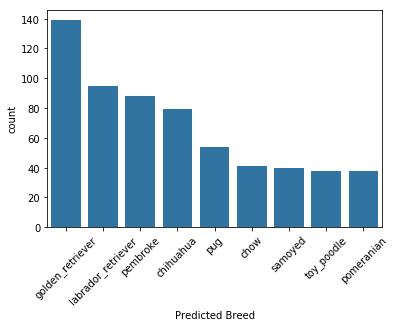

In [63]:
sns.countplot(data=top_ten_dog_df, x='prediction_1', order=top_ten_dog_list, color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.xlabel('Predicted Breed');

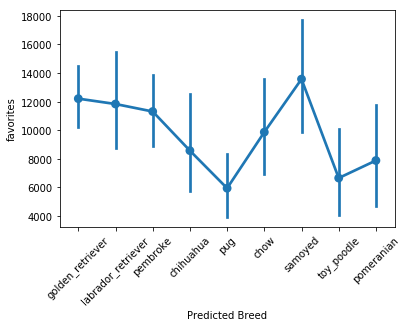

In [64]:
sns.pointplot(data=top_ten_dog_df, x='prediction_1', y='favorites', order=top_ten_dog_list, color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.xlabel('Predicted Breed');

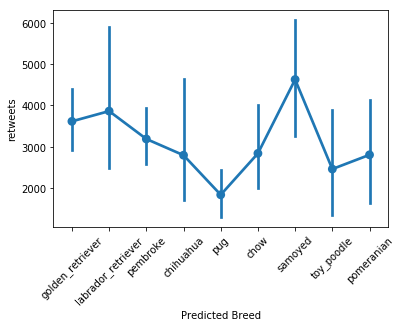

In [65]:
sns.pointplot(data=top_ten_dog_df, x='prediction_1', y='retweets', order=top_ten_dog_list, color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.xlabel('Predicted Breed');

In [66]:
top_ten_dog_df.groupby('prediction_1').p1_conf.mean().sort_values(ascending=False)

prediction_1
pug                   0.759223
samoyed               0.747088
pomeranian            0.743606
golden_retriever      0.721001
pembroke              0.717223
labrador_retriever    0.659139
chow                  0.615648
toy_poodle            0.612641
chihuahua             0.588905
Name: p1_conf, dtype: float64

### Insights:
1. Golden retrievers are the dogs most predicted by the neural network classifer.

2. Samoyeds had, on average, the highest number of retweets and favorites.

3. The neural net algorithm was most confident when predicting Pugs.